In [35]:
# importing libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
# using Opensv haarcascade to recognize faces
face_cascade = cv2.CascadeClassifier('/Users/mika/Desktop/Mika/RHCP Classifier/haarcascades/haarcascade_frontalface_default.xml')

In [37]:
# function for cropping the original pictures
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    roi=[] 
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            roi.append(roi_color)
    return roi

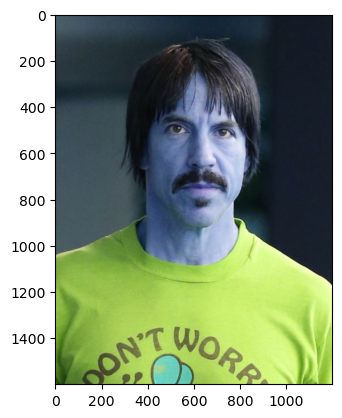

In [38]:
# reading an image
x='/Users/mika/Desktop/Mika/RHCP Classifier/Members/anthony kiedis – Google Suche/277700 (1).jpg'
original_image=cv2.imread(x)
plt.imshow(original_image)

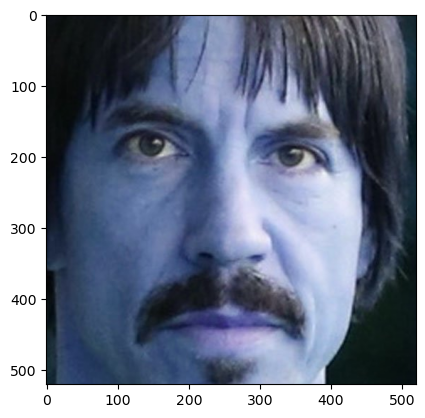

In [39]:
#cropping the face from the image

cropped_image=get_cropped_image_if_2_eyes(x)
for i in range(len(cropped_image)):
    plt.imshow(cropped_image[i])

In [40]:
path_to_data = "/Users/mika/Desktop/Mika/RHCP Classifier/Members/"
path_to_cr_data = "/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/"

In [41]:
# dataset folder contains folders of different personalities which are containing raw images
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['/Users/mika/Desktop/Mika/RHCP Classifier/Members/john frusciante – Google Suche',
 '/Users/mika/Desktop/Mika/RHCP Classifier/Members/anthony kiedis – Google Suche',
 '/Users/mika/Desktop/Mika/RHCP Classifier/Members/.ipynb_checkpoints',
 '/Users/mika/Desktop/Mika/RHCP Classifier/Members/flea bassist – Google Suche',
 '/Users/mika/Desktop/Mika/RHCP Classifier/Members/chad smith – Google Suche']

In [42]:
'''# creating a cropped folder to store cropped face images
import shutil
# if folder "cropped" exists remove it
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
# create folder
os.mkdir(path_to_cr_data)'''

'# creating a cropped folder to store cropped face images\nimport shutil\n# if folder "cropped" exists remove it\nif os.path.exists(path_to_cr_data):\n     shutil.rmtree(path_to_cr_data)\n# create folder\nos.mkdir(path_to_cr_data)'

In [43]:
"""
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
#         print(entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if len(roi_color)!=0:
            for i in range(len(roi_color)):
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                cropped_file_name = celebrity_name + str(count) + ".png"
                
                cropped_file_path = cropped_folder + "/" + cropped_file_name
                cv2.imwrite(cropped_file_path, roi_color[i])
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count +=1
"""

'\ncropped_image_dirs = []\ncelebrity_file_names_dict = {}\nfor img_dir in img_dirs:\n    count = 1\n    celebrity_name = img_dir.split(\'/\')[-1]\n    print(celebrity_name)\n    celebrity_file_names_dict[celebrity_name] = []\n    \n    for entry in os.scandir(img_dir):\n#         print(entry)\n        roi_color = get_cropped_image_if_2_eyes(entry.path)\n        if len(roi_color)!=0:\n            for i in range(len(roi_color)):\n                cropped_folder = path_to_cr_data + celebrity_name\n                if not os.path.exists(cropped_folder):\n                    os.makedirs(cropped_folder)\n                    cropped_image_dirs.append(cropped_folder)\n                    print("Generating cropped images in folder: ",cropped_folder)\n                cropped_file_name = celebrity_name + str(count) + ".png"\n                \n                cropped_file_path = cropped_folder + "/" + cropped_file_name\n                cv2.imwrite(cropped_file_path, roi_color[i])\n                c

In [44]:
import os

def create_image_paths_dict(folder_path):
    image_paths_dict = {}

    for folder_name, subfolders, files in os.walk(folder_path):
        image_paths = [os.path.join(folder_name, file) for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
        if image_paths:
            image_paths_dict[folder_name] = image_paths

    return image_paths_dict

path = "/Users/mika/Desktop/Mika/RHCP Classifier/Cropped"
image_paths_dict = create_image_paths_dict(path)

for folder, image_paths in image_paths_dict.items():
    print(f"Folder: {folder}")
    print(f"Image Paths: {image_paths}")
    print()


Folder: /Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2
Image Paths: ['/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche205.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche239.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche74.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche48.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche167.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche173.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche199.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche172.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche61.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad sm

In [45]:
import os

def create_image_paths_dict(folder_path):
    image_paths_dict = {}

    for folder_name, subfolders, files in os.walk(folder_path):
        if subfolders:
            continue  # Skip folders with subfolders

        folder_key = os.path.basename(folder_name)
        image_paths = [os.path.join(folder_name, file) for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
        if image_paths:
            image_paths_dict[folder_key] = image_paths

    return image_paths_dict

path = "/Users/mika/Desktop/Mika/RHCP Classifier/Cropped"
image_paths_dict = create_image_paths_dict(path)

for folder, image_paths in image_paths_dict.items():
    print(f"Folder: {folder}")
    print(f"Image Paths: {image_paths}")
    print()


Folder: c Kopie 2
Image Paths: ['/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche205.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche239.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche74.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche48.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche167.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche173.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche199.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche172.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche61.png', '/Users/mika/Desktop/Mika/RHCP Classifier/Cropped/c Kopie 2/chad smith – Google Suche204.png', '/Users/mika/Desktop/

In [46]:
# Generating wavelet images for fitting into SVM and Logistic Regression models.

import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    #Data-type conversion
    #convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255
    #computeCoefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

In [47]:
"""
celebrity_file_names_dict2={}
for img_dir in img_dirs:
#     print(img_dir)
    celebrity_name = img_dir.split('/')[-1]
#     print(celebrity_name)
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict2[celebrity_name] = file_list
celebrity_file_names_dict2
"""

"\ncelebrity_file_names_dict2={}\nfor img_dir in img_dirs:\n#     print(img_dir)\n    celebrity_name = img_dir.split('/')[-1]\n#     print(celebrity_name)\n    file_list = []\n    for entry in os.scandir(img_dir):\n        file_list.append(entry.path)\n    celebrity_file_names_dict2[celebrity_name] = file_list\ncelebrity_file_names_dict2\n"

In [48]:
class_dict2 = {}
count = 0
for celebrity_name in image_paths_dict.keys():
    class_dict2[celebrity_name] = count
    count = count + 1
class_dict2

{'c Kopie 2': 0, 'j Kopie 2': 1, 'a Kopie 2': 2, 'f Kopie 2': 3}

In [49]:
# inverse dictionary
inv_dict2 = dict(zip(class_dict2.values(), class_dict2.keys())) 
inv_dict2

{0: 'c Kopie 2', 1: 'j Kopie 2', 2: 'a Kopie 2', 3: 'f Kopie 2'}

In [50]:
X, y = [], []
for celebrity_name, training_files in image_paths_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        
        if img is not None:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict2[celebrity_name])

In [51]:
# we have total 389 images to fit into model
len(X)

389

In [52]:
# reshaping to 32*32*2 size
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(389, 4096)

In [53]:
# fitting into SVM classfier with rbf kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7755102040816326

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81        31
           1       0.52      0.83      0.64        18
           2       0.93      0.79      0.86        34
           3       0.71      0.80      0.75        15

    accuracy                           0.78        98
   macro avg       0.78      0.78      0.77        98
weighted avg       0.83      0.78      0.79        98



In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100],
            'svc__kernel': ['rbf','linear']
        }  
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.766803,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,logistic_regression,0.780479,{'logisticregression__C': 1}


In [57]:
best_estimators['svm'].score(X_test,y_test)

0.7653061224489796

In [58]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.7142857142857143

In [59]:
best_clf = best_estimators['svm']
best_lr = best_estimators['logistic_regression']

In [61]:
best_clf
best_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [181]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.64      0.60      0.62        15
           2       0.65      0.74      0.69        23
           3       0.77      0.79      0.78        29

    accuracy                           0.77        98
   macro avg       0.75      0.74      0.74        98
weighted avg       0.77      0.77      0.77        98



In [62]:
print(classification_report(y_test, best_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69        31
           1       0.53      0.56      0.54        18
           2       0.85      0.85      0.85        34
           3       0.54      0.87      0.67        15

    accuracy                           0.71        98
   macro avg       0.69      0.71      0.69        98
weighted avg       0.75      0.71      0.72        98



In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[26,  0,  4,  1],
       [ 0,  9,  1,  5],
       [ 1,  4, 17,  1],
       [ 1,  1,  4, 23]])

Text(95.72222222222221, 0.5, 'Truth')

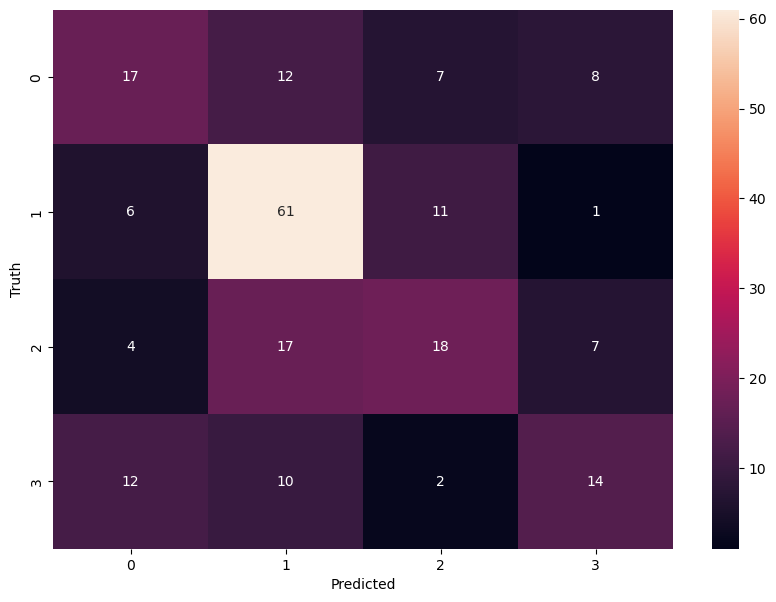

In [120]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')